# METODOLOGIA BOX-JENKINS


O objetivo desse projeto é estudar, junto com a linguagem python, a metodologia usada para criar modelos univariados de séries temporais. Essa metodologia é chamada de Box-Jenkins é considerada uma método ateórico, ou seja, não há uma teoria econômica por trás; a ideia dessa metodologia é que os dados *falem por si próprio*. Dessa forma as previsões geradas por essa são definidas pelos seus valores defasados ($Y_{t+1}$ é uma função de $Y_{t},Y_{t-1},Y_{t-2},\dots$).

Essa metodologia também é chamada de modelagem **ARIMA**.

A palavra **ARIMA** refere-se a composição de uma série temporal. Uma série temporal pode ter um componente **autorregressivo** (AR) e um componente de **médias móveis** (MA); e esses componentes podem estar **integrados** (I).

Vamos falar um pouco sobre cada um desses componentes:

**1) Componente autorregressivo (AR): Quando falamos que uma série temporal segue um processo autorregressivo, estamos dizendo que a dinâmica dos dados está na parte observável da série, ou seja, em suas defasagens. Podemos descrever um processo autorregressivo com a função abaixo:**

$Y_{t} = c + \phi_{1}.Y_{t-1} +\phi_{2}.Y_{t-2} + \dots + \phi_{p}.Y_{t-p} + u_{t}$

Veja que a observação atual é a soma de uma constante com uma parte de cada observação defasada e o erro (que é um ruído brnaco com média 0 e variância constante). A grande questão é saber qual as defasagens ideais para essa função e esse número de defasagens ou a ordem de defasagens é nomeada como *p*.

Assim precisamos encontrar o valor de *p*. 

Se o valor de *p* for igual a 1, teremos um processo AR(1) que pode ser escrito como $Y_{t} = c + \phi_{1}.Y_{t-1} + u_{t}$. 

Se o valor de *p* for igual a 2, teremos um processo AR(2) que pode ser escrito como $Y_{t} = c + \phi_{1}.Y_{t-1} + \phi_{2}.Y_{t-2} + u_{t}$. 

E, assim, sucessivamente.

**2) Integração (I): Esse componente trata de um conceito muito falado em séries temporais, que é o de estacionariedade. Basicamente, estacionariedade é a característica da série ser bem comportadada, ou seja, quando sua média e variância são constante com o tempo e a sua covarância (em diferentes instantes de tempo) não depende do tempo.**

As vezes as séries não apresentam essa característica e por conta disso é necessário estacionarizá-la. Existem diferentes formas de fazer isso, porém a mais usada é a diferenciação.

Usemos um processo AR(1) temos: $Y_{t} = c + \phi_{1}.Y_{t-1} + u_{t}$. Um processo AR(1) será não estacionário se $\phi_{1} \geq 1$ (na parte do teste de estacionariedade, será explicado melhor isso), então suponha que $\phi_{1} = 1$, logo teremos um processo da seguinte forma $Y_{t} = c + Y_{t-1} + u_{t}$, porém de subtrairmos $Y_{t-1}$ em ambos os lados temos teremos : $Y_{t} - Y_{t-1} = c + u_{t}$, onde $c$ é uma constante e $u_{t}$ é um ruído branco. Temos então um processo que é estacionário, pois a média e a variância são constantes.

Isso que foi feito é a diferenciação, onde vamos subtrair da observação atual a observação anterior.

O número de vezes que uma série é diferenciada, até se tornar estacionária é o valor de **I** em um processo **ARIMA** e esse número de vezes denominamos por *d*.


**3) Componente de Médias Móveis (MA): Como falamos anteriormente, em um AR(p) a dinâmica do processo está na parte observável, que são as defasagens da série, porém em um processo de médias móveis, ou MA(q), a dinâmica está nos erros, por isso um processo MA(q) pode ser escrito da seguinte forma:**

$Yt = \mu + u_{t} + \theta_{1}u_{t-1} + \dots + \theta_{q}u_{t-q}$

Assim como em processo AR(p), em processo MA(q) precisamos encontrar a ordem *q* desses processos de médias móveis.


**Quando unimos um processo AR(p) e um processo MA(q) temos um processo ARMA(p,q) que pode ser representado da seguinte forma:**

$Y_{t} = c + \phi_{1}.Y_{t-1} +\phi_{2}.Y_{t-2} + \dots + \phi_{p}.Y_{t-p} + u_{t} + \theta_{1}u_{t-1} + \dots + \theta_{q}u_{t-q}$


E teremos um processo **ARIMA(p,d,q)** se precisar diferenciar a série temporal antes desse processo.

**Observação**: Todo processo AR(p) poder ser ou não estacionário, mas todo processo MA(q) é estacionário. Logo, em um processo ARIMA(p,d,q) o que determina se o processo é ou não estacionário é seu componente autorregressivo.

Explicado então sobre os componentes dos processos **ARIMA** vamos explicar sobre as etapas da modelagem Box-jenkins. Essa abordagem é dividida em 4 etapas:

1) Identificação: Como já explicado anteriormente, nos processos ARIMA é preciso identificar os ordens *p,d,q* e é na etapa de identificação que iremos encontrar esses valores por meio da função de autocorrelação (ACF) e a da função de autocorrelação parcial (PACF), que nada mais são que gráficos que nos mostrarão quais os valores usar em cada componente. Assim vamos poder identificar os candidatos a modelos;

2) Estimação: Nessa etapa vamos gerar modelos com base nos valores de *p,d e q* encontrados na etapa anterior e escolheremos o modelo pelo menor critério de informação (AIC/BIC/HQIC), ou seja, o modelo mais simples;

3) Diagnóstico dos resíduos: Aqui iremos analisar os resíduos do modelo aplicando teste para saber se os resíduos são bem comportados ou não; caso os resíduos não sejam, vamos para o próximo modelo pelo menor critério de informação e assim sucessivamente, até encontrarmos um modelos ideal;

4) Previsão: Definido o modelo, iremos estimar valores futuros para a série temporal.


# Dados

O dados usados foram obtidos [aqui](https://www.kaggle.com/bulentsiyah/for-simple-exercises-time-series-forecasting?select=BeerWineLiquor.csv). A série trata do consumo de cerveja, tem periodicidade mensal (324 meses) e vai do ano de 1992 até o ano de 2018.

# Importação das bibliotecas

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.api as sm
from datetime import datetime

from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import jarque_bera
import scipy.stats as sct
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [320]:
#Importando os dados
beer=pd.read_csv('Beer.csv')

In [321]:
#visualizando as primeiras sete observações, vemos que há duas colunas (uma com as datas e outra com o valor do consumo de 
#cerveja)
beer.head(7)

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
5,6/1/1992,1775
6,7/1/1992,1912


In [322]:
#Vamos indexar a base de dados à coluna 'date'
beer=beer.set_index('date')

In [323]:
#Após a indexação temos uma base de dados com 324 observações e 1 coluna apenas
beer.shape

(324, 1)

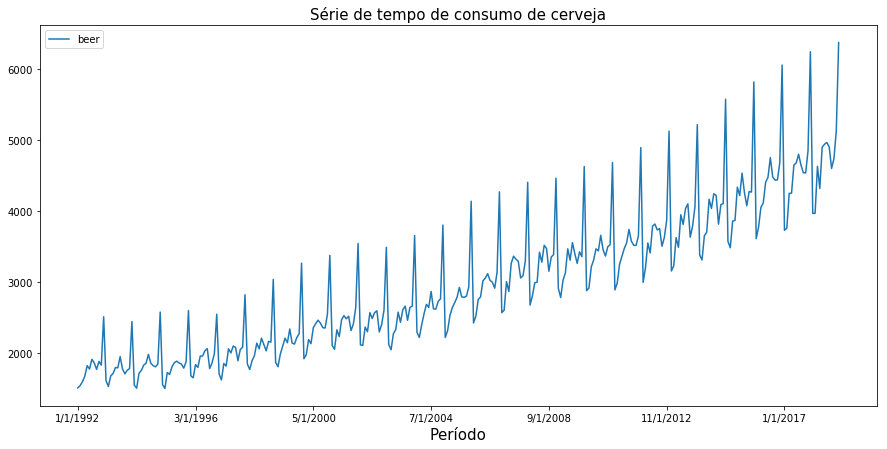

In [324]:
beer.plot(figsize=(15,7), legend=True)
plt.xlabel('Período',size=15)
plt.title('Série de tempo de consumo de cerveja',size=15);

#Podemos notar que a série possui tendência e uma forte presença de sazonalidade

Queremos modelar essa série temporal, podemos usar a forma automática usando o auto-ARIMA da biblioteca PMDARIMA que será explorado mais para frente ou usar a metodologia Box-Jenkins (que é justamente o que queremos). Como a série possui sazonalidade teríamos que usar uma modelagem SARIMA (adição de um componente sazonal), porém isso estenderia nosso trabalho, pois além de termos que encontrar as ordens *p,d* e *q*, teríamos que encontrar as ordem *P,D* e *Q*.

Uma alternativa a isso é removermos a sazonalidade da série temporal, aplicarmos a metodologia Box-Jenkins e depois adicinamos novamente a sazonalidade à série temporal. Para removermos a sazonalidade usaremos o módulo *seasonal_decompose* da biblioteca **Statsmodels**.

Esse módulo irá decompor a série em 3 componente: Tendência, Sazonalidade e erro. Essa decomposição pode ser da forma **aditiva** ou **multiplicativa**, então usaremos as duas e veremos qual é a melhor.

Antes de iniciarmos a decomposição da série, vamos expor a sazonalidade, ou seja, mostrar que realmente há sazonalidade na série plotando alguns gráficos. Mesmo a sazonalidade estando visível, essa etapa anterior é uma boa prática, pois em determinadas séries o componente sazonal não é perceptível.

In [325]:
#criando uma nova série com datetime
beer1= pd.DataFrame(data=beer.values, index=pd.date_range(start=datetime(1992, 1,1), 
                                                              end = datetime(2018,12,1), freq='MS'), columns=['beer'])

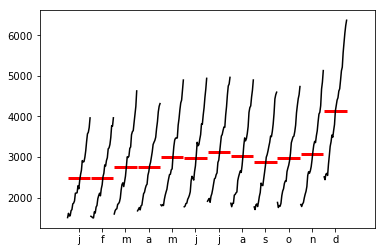

In [326]:
month_plot(beer1);
#Caso não existesse a presença de sazonalidade as linha vermelhas estariam alinhadas, o que não ocorre

# Decompondo a série

Decompondo a série sob a forma multiplicativa, a série pode ser colocada da seguinte forma, 

$Y_{t} = T_{t} * S_{t} * e_{t}$

onde $T_{t}$ é a tendência, $S_{t}$ é a sazonalidade e $e_{t}$ é o erro ou resíduo, logo a série sem sazonalidade seria

$   \frac{Y_{t}}{S_{t}} = T_{t} * e_{t}$

In [327]:
beer2= pd.DataFrame(data=beer.values, index=pd.date_range(start=datetime(1992, 1,1), 
                                                              end = datetime(2018,12,1), freq='MS'), columns=['beer'])

In [328]:
result=seasonal_decompose(beer2, model='multiplicative')
#Vamos decompor a série na forma multiplicativa

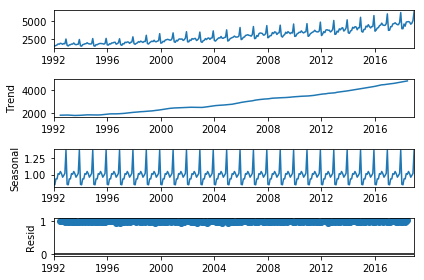

In [329]:
result.plot();
#Abaxi podemos ver os gráficos com as seguintes séries: Original, Tendência, Sazonalidade e resíduos.

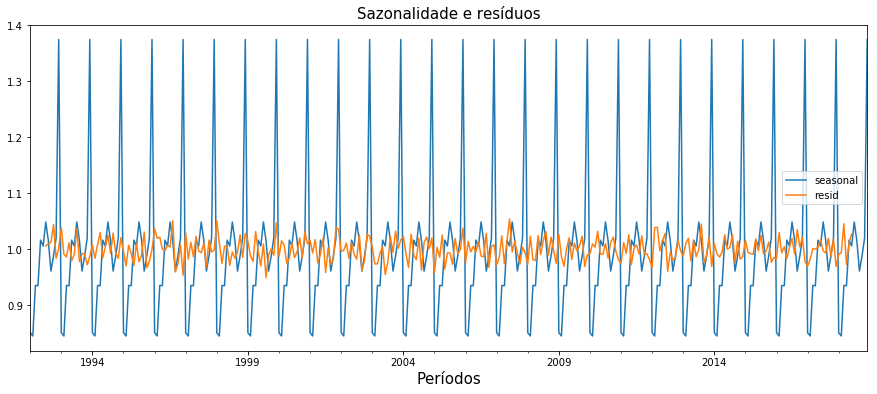

In [330]:
plt.figure(figsize=(15,6))
result.seasonal.plot(legend=True)
result.resid.plot(legend=True)
plt.xlabel('Períodos',size=15)
plt.title('Sazonalidade e resíduos',size=15);

#Abaixo as séries de sazonalidade e de resíduos.

Text(0.5, 1.0, 'Série de tendência')

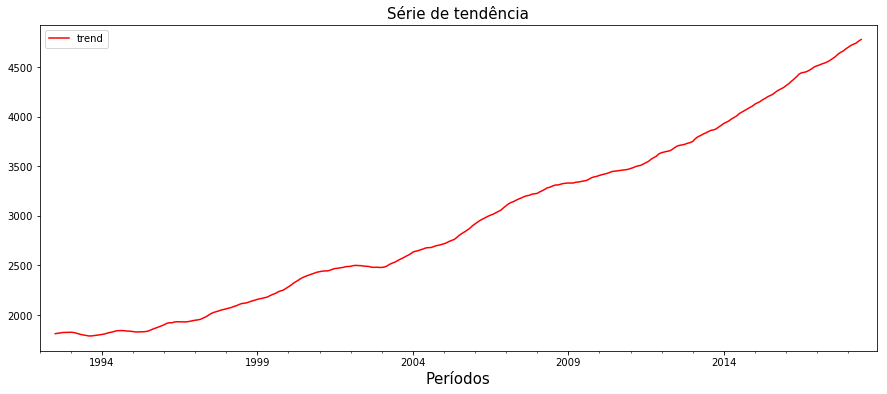

In [331]:
plt.figure(figsize=(15,6))
result.trend.plot(legend=True, color='r')
plt.xlabel('Períodos',size=15)
plt.title('Série de tendência',size=15)

In [332]:
#Aqui eu estou criando uma nova série

#como decompomos a série de forma multiplicativa, se multiplicarmos os componentes de erro e tendência, obteremos a série sem
#o componente sazonal, ou seja, dessazonalizada
beer3 = (result.trend*result.resid)

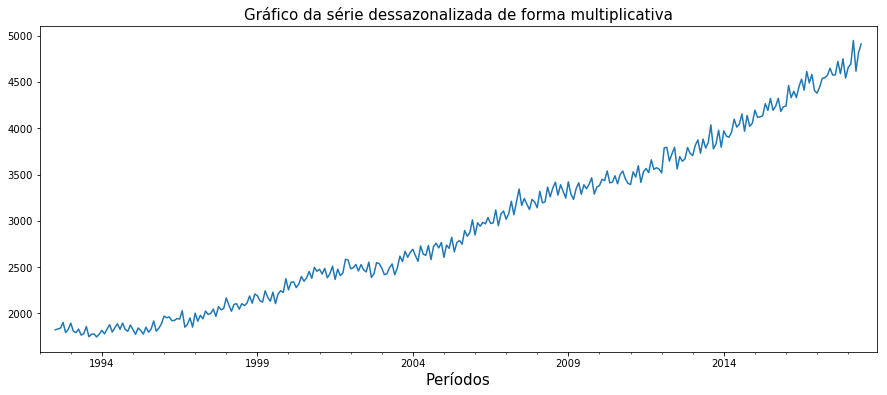

In [333]:
plt.figure(figsize=(15,6))
beer3.plot()
plt.xlabel('Períodos',size=15)
plt.title('Gráfico da série dessazonalizada de forma multiplicativa',size=15);

#Podemos notar que não presença de períodos repetitivos como ocorre em séries com sazonalidade

In [334]:
beer2['sazonalidade']=pd.DataFrame(data=result.seasonal.values, index=pd.date_range(start=datetime(1992, 1,1), 
                                                              end = datetime(2018,12,1), freq='MS'))
#vamos criar uma coluna da sazonalidade da série

In [335]:
#e aqui uma coluna da série dessazonalizada
beer2['dessazon']=beer2['beer']/beer2['sazonalidade']

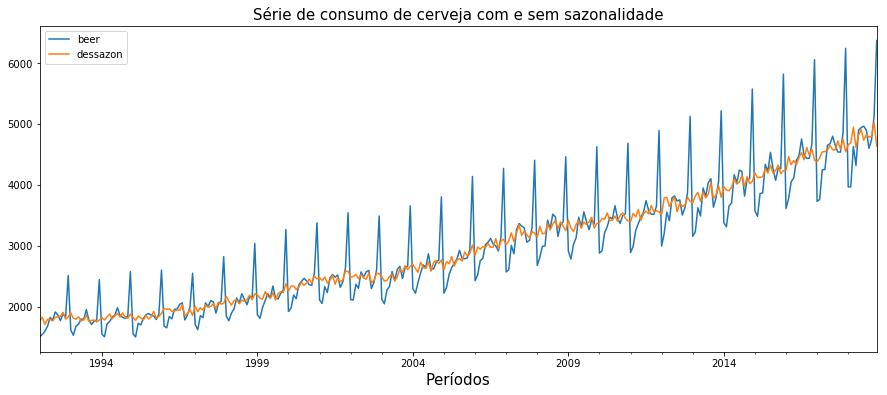

In [336]:
beer2[['beer','dessazon']].plot(figsize=(15,6))
plt.xlabel('Períodos',size=15)
plt.title('Série de consumo de cerveja com e sem sazonalidade',size=15);

#nesse gráfico fica claro que o processo foi bem sucedido

In [337]:
beer2.head(24)
#Aqui podemos ver a base de dados com as colunas.

#notar que a sazonalidade, sob a forma multiplicativa se repete ano a ano
#Os valores de janeiro são os mesmo para cada ano, assim como nos outros meses

,beer,sazonalidade,dessazon
1992-01-01,1509,0.851488,1772.192481
1992-02-01,1541,0.845652,1822.263466
1992-03-01,1597,0.935704,1706.736293
1992-04-01,1675,0.935312,1790.847179
1992-05-01,1822,1.016572,1792.297425
1992-06-01,1775,1.006069,1764.293282
1992-07-01,1912,1.048870,1822.914513
1992-08-01,1862,1.015768,1833.096339
1992-09-01,1770,0.961365,1841.131951
1992-10-01,1882,0.988448,1903.995510


Decompondo a série sob a forma aditiva, a série pode ser colocada da seguinte forma, 

$Y_{t} = T_{t} + S_{t} + e_{t}$,

onde $T_{t}$ é a tendência, $S_{t}$ é a sazonalidade e $e_{t}$ é o erro ou resíduo, logo a série sem sazonalidade seria

$Y_{t} - S_{t} = T_{t} + e_{t}$.

In [338]:
#decomponda série na forma aditiva
result1=seasonal_decompose(beer2['beer'], model='additive')

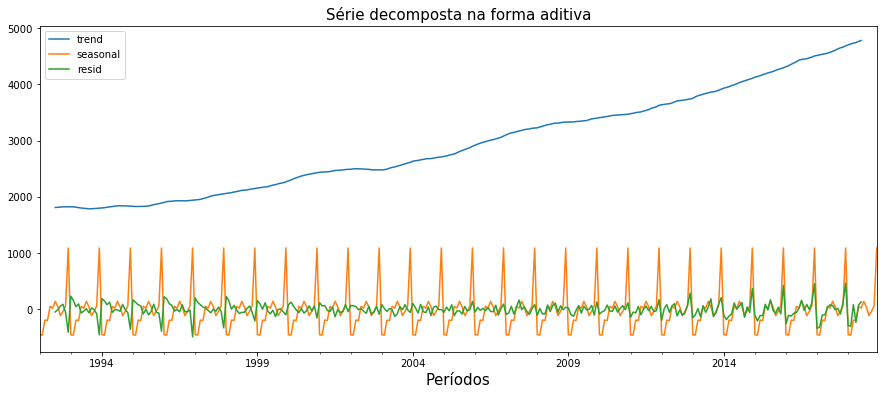

In [339]:
plt.figure(figsize=(15,6))
result1.trend.plot(legend=True)
result1.seasonal.plot(legend=True)
result1.resid.plot(legend=True)
plt.xlabel('Períodos',size=15)
plt.title('Série decomposta na forma aditiva',size=15);

In [340]:
#Irei criar uma outra base de dados com a decomposição aditiva
beer5=pd.DataFrame(data=result1.seasonal.values, index=pd.date_range(start=datetime(1992, 1,1), 
                                                              end = datetime(2018,12,1), freq='MS'),columns=['sazonalidade'])

In [341]:
#vou adicionar o série original a ela
beer5['beer']=beer2['beer']

In [342]:
#e ao invés de dividir para extrair a sazonalidade, vamos subtrair
beer5['dessazon']=beer5['beer']-beer5['sazonalidade']

In [343]:
#A nova base
beer5

#Podemos ver que a sazonalidade, na forma aditiva, possui valores negativos (ou seja valores maiores ou menores que zero)
#diferente da forma multiplicativa que os valores são sempre positivo

,sazonalidade,beer,dessazon
1992-01-01,-448.378072,1509,1957.378072
1992-02-01,-454.748264,1541,1995.748264
1992-03-01,-187.838007,1597,1784.838007
1992-04-01,-195.945379,1675,1870.945379
1992-05-01,56.077057,1822,1765.922943
...,...,...,...
2018-08-01,48.466480,4898,4849.533520
2018-09-01,-109.818777,4598,4707.818777
2018-10-01,-32.719418,4737,4769.719418
2018-11-01,63.964877,5130,5066.035123


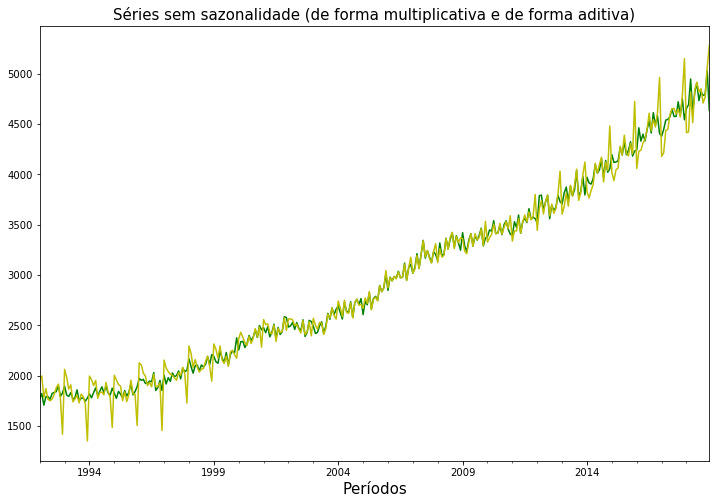

In [344]:
beer2['dessazon'].plot(figsize=(12,8),color='g')
beer5['dessazon'].plot(color='y')
plt.xlabel('Períodos',size=15)
plt.title('Séries sem sazonalidade (de forma multiplicativa e de forma aditiva)',size=15);

#Na cor amarela temos a série sem a sazonalidade na forma aditiva

#de ver a série sem sazonalidade na forma multiplicativa

#Podemos ver que série na forma aditiva possui alguns períodos (no início e no final) com o que se parece um tipo de 
#sazonalidade

#Já na forma multiplicativa não há essa situação

#então para modelagem Box-Jenkins iremos usar a série sem a sazonalidade na forma multiplicativa

# Box-Jenkins - Etapa de Identificação

# Ordem *d*

Para iniciar a abordagem Box-Jenkins começaremos identificando as ordens *p,d* e *q*. A primeira ordem a ser identificada é a ordem *d*. Como já explicado anteriormente, a ordem *d* trata do número de vezes que precisaremos diferenciar uma série temporal até ela se tornar estacionária, ou seja, até os seus dois primeiros momentos (média e variância) serem constantes.

Para podermos identificar a ordem *d* precisaremos testar se a série é estacionária, se a série já possuir essa propriedade a ordem *d* será 0 (d=0), caso contrário vamos diferenciá-la e testar novamente e faremos isso sucessivamente até encontrarmos *d*. 

Podemos fazer isso de duas formas: uma subjetiva e outra objetiva.

A forma subjetiva é observando o gráfico de autocorrelação. Se o decaimento das autocorrelações for lento há evidência que a série é não estacionária.

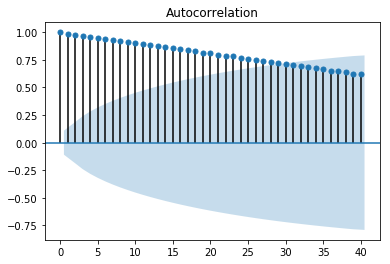

In [345]:
#Vamos plotar o gráfico de autocorrelação da série beer2['dessazon']
plot_acf(beer2['dessazon'],lags=40);
#decaimento lento, evidência que a série não é estacionária, mesmo com 40 defasagens

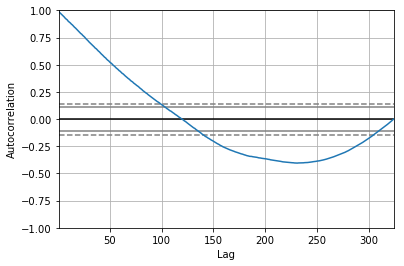

In [346]:
#Podemos também plotar usando o pandas
autocorrelation_plot(beer2['dessazon'])

#Aqui fica mais evidente o decaimento lento, só após a centésima defasagem

A forma objetiva é usar o teste Dickey-Fuller Aumentado ou teste ADF ou também chamado de teste de raiz unitária.

Por que teste de raiz unitária ?

Bem, como falamos anteriormente, o que determina se uma série é estacionária ou não, é o componente autorregressivo (AR) na abordagem ARIMA. Tomemos novamente um processo AR(1) com $\phi = 1$,

$Y_{t} = c + Y_{t-1} + u_{t}$

Podemos generalizar da seguinte forma,

$Y_{t-1} = c + Y_{t-2} + u_{t-1}$

$Y_{t-2} = c + Y_{t-3} + u_{t-2}$

$\vdots$

Se substituirmos as funções uma nas outras teremos ao final:

$Y_{t} = ct + Y_{0} +\sum_{j=1}^{t} u_{j}$

Podemos perceber que a média está em função do tempo, ao tirarmos a esperança desse e a variância será $\sigma^{2}t$. Ou seja, nem a média nem a variância são constantes, logo um processo AR(1) com $\phi = 1$ não é estacionário.

Tomemos um processo AR(p)

$Y_{t} = c + \phi_{1}.Y_{t-1} +\phi_{2}.Y_{t-2} + \dots + \phi_{p}.Y_{t-p} + u_{t}$

Podemos reescrevê-lo como,

$Y_{t} = c + \phi_{1}BY_{t} +\phi_{2}B^{2}.Y_{t} + \dots + \phi_{p}B^{p}.Y_{t} + u_{t}$

$(1 -\phi_{1}B +\phi_{2}B^{2} + \dots + \phi_{p}B^{p})Y_{t}= c + u_{t}$

Um processo AR(p) será estacionário se e somente se as raízes de $(1 -\phi_{1}B +\phi_{2}B^{2} + \dots + \phi_{p}B^{p}) = 0$ estiverem fora do círculo unitário.



Como dito anteriormente, o método usado para testar se uma série é estacionária ou não é chamado de teste de raiz unitária.

As hipóteses do teste são:

$H_{0}$ : Há presença de raiz unitária ou o processo segue um passeio aleatório;

$H_{1}$ : Não há presença de raiz unitária ou o processo segue um processo estacionário.

Rejeitamos $H_{0}$ se a estatística do teste for menor que o valor crítico.

Abaixo podemos ver as estatístisticas geradas pelo teste Dickey-Fuller Aumentado.

In [347]:
print('Estatística do teste Dickey-Fuller:',adfuller(beer2['dessazon'])[0])
print('P-valor:',adfuller(beer2['dessazon'])[1])
print('Defasagens usadas no teste:',adfuller(beer2['dessazon'])[2])
print('Observações usadas:',adfuller(beer2['dessazon'])[3])
print('Valores críticos:',adfuller(beer2['dessazon'])[4])

#há 99.908% de chance de h0 ser verdadeira, ou seja, acitamos a hipótese nula de que há raiz unitária

#Como a estatística de teste é maior que o valor crítico a 5%, aceitamos H0

Estatística do teste Dickey-Fuller: 2.7243616282061627
P-valor: 0.999087915549511
Defasagens usadas no teste: 14
Observações usadas: 309
Valores críticos: {'1%': -3.45169128009473, '5%': -2.8709394227049154, '10%': -2.5717780602423517}


Hipótese Nula aceita, diferenciar a série apenas uma vez e usar o teste ADF novamente para saber se após a diferenciação a série se torna estacionária ou não.

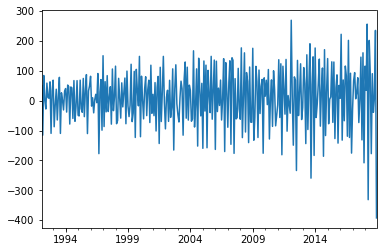

In [348]:
beer2_dessazon_diff=diff(beer2['dessazon'],k_diff=1)
beer2_dessazon_diff.plot()

In [349]:
print('Estatística do teste Dickey-Fuller:',adfuller(beer2_dessazon_diff)[0])
print('P-valor:',adfuller(beer2_dessazon_diff)[1])
print('Defasagens usadas no teste:',adfuller(beer2_dessazon_diff)[2])
print('Observações usadas:',adfuller(beer2_dessazon_diff)[3])
print('Valores críticos:',adfuller(beer2_dessazon_diff)[4])

#há 0.00018% de chance de h0 ser verdadeira, ou seja, rejeitamos a hipótese nula de que há raiz unitária

#Como a estatística de teste é menor que o valor crítico a 5%, rejeitamos H0

#a série é estacionária

Estatística do teste Dickey-Fuller: -4.518280357349174
P-valor: 0.00018221306206454664
Defasagens usadas no teste: 13
Observações usadas: 309
Valores críticos: {'1%': -3.45169128009473, '5%': -2.8709394227049154, '10%': -2.5717780602423517}


A série diferenciada é estacionária, logo a ordem *d* é igual a 1, precisamos diferenciar a série apenas uma vez para torná-la estacionária.

# Ordens *p* e *q*

Para definir as ordens *p* e *q* nós usaremos as funções de autocorrelação e de autocorrelação parcial, que, como já dito, são gráficos que mostram a correlação da observação atual com suas defasagens.

A **função de autocorrelação (ACF)** nos dará as possíveis ordens do componente de médias móveis (MA) e a **função de autocorrelação parcial** nos dará as possíveis ordens do compoenente autorregressivo (AR). Mas para isso iremos plotar a ACF e PACF da série diferenciada e observar as defasagens que são mais estatisticamente significativas, ou seja, as que estiverem fora do intervalo de confiança gerado nos gráficos.

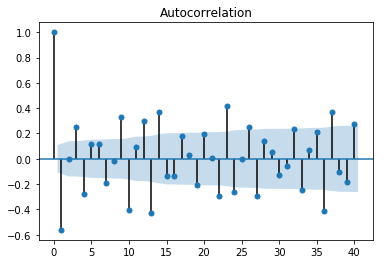

In [350]:
plot_acf(beer2_dessazon_diff,lags=40);

#Plotando o gráfico ACF da série diferenciada vemos que as defasagens mais significativas são a 1 e a 2.
#Logo as possíevis ordens de q podem ser 0 e 1

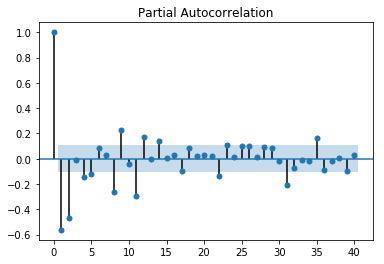

In [351]:
plot_pacf(beer2_dessazon_diff,lags=40);

#Plotando o gráfico PACF da série diferenciada vemos que as defasagens mais significativas são a 1, 2 e 3.
#Logo as possíevis ordens de p podem ser 0, 1 e 2.

# Box-Jenkins - Etapa de Estimação

Ordens selecionadas:

p = 0 ou 1 ou 2

d = 1

q = 0 ou 1

Vamos estimar os modelos candidatos abaixo:

ARIMA(0,1,0), ARIMA(0,1,1), ARIMA(1,1,0), ARIMA(1,1,1), ARIMA(2,1,0), ARIMA(2,1,1).

Temos, então, as 6 possibilidades à modelos candidatos. Vamos testar cada um desses modelos e escolheremos aquele que possui o menor critério de informação. Os critérios de informação servem como forma de penalizar o modelo mais ampliado. O critério mais usado é o **Akaike Information Criteria** ou **Critério de Informação de Akaike**

$ AIC = 2k - 2ln(L)$, onde k é o número de parâmetros e L é o valor da função de Máximo Verossimilhança.

Existem auternativas ao AIC, como o BIC ou SIC (**Critério de informação Bayesiano ou critério de informação Schwarz**),

$ BIC = klog(T) - 2ln(L)$, onde T é o número de observações.

AICc (**Critério de Informação de Akaike corrigido**),

$AICc = 2k\big(\frac{T}{T-K-1}\big) - 2ln(L)$

e o HQIC (**critério de informação de Hannan-Quinn**):

$HQIC = 2kln(ln(T)) - 2ln(L)$

Abaixo vamos testar cada modelo e observar seus critérios de informação (etapa de estimação).

In [352]:
#definindo uma lista para cada ordem com os valores escolhidos
q=[0,1]
p=[0,1,2]
d=[1]
#vamos criar as combinações com as ordens escolhidas
pdq=list(itertools.product(p,d,q))
pdq

#temos aqui a lista de parâmetros de cada modelo a ser testado

[(0, 1, 0), (0, 1, 1), (1, 1, 0), (1, 1, 1), (2, 1, 0), (2, 1, 1)]

In [353]:
#Vamos criar um loop for para testar todas as possibilidades de modelos
for param in pdq:
    modelo_arima=ARIMA(beer2['dessazon'], order=param)
    modelo_arima_fit=modelo_arima.fit()
    print('ARIMA',param,'-', 'AIC do modelo:',modelo_arima_fit.aic,'-','BIC do modelo:', modelo_arima_fit.bic,
          '-','HQIC do modelo:', modelo_arima_fit.hqic)
    
#O modelo escolhido, por ter o menor critério de informação, foi o ARIMA (2, 1, 3)

ARIMA (0, 1, 0) - AIC do modelo: 3895.21591931015 - BIC do modelo: 3902.7712239565953 - HQIC do modelo: 3898.2319090210344
ARIMA (0, 1, 1) - AIC do modelo: 3707.6902280781396 - BIC do modelo: 3719.0231850478076 - HQIC do modelo: 3712.214212644466
ARIMA (1, 1, 0) - AIC do modelo: 3767.097779473195 - BIC do modelo: 3778.430736442863 - HQIC do modelo: 3771.621764039521
ARIMA (1, 1, 1) - AIC do modelo: 3693.696264964271 - BIC do modelo: 3708.806874257162 - HQIC do modelo: 3699.7282443860395
ARIMA (2, 1, 0) - AIC do modelo: 3682.502398389158 - BIC do modelo: 3697.6130076820486 - HQIC do modelo: 3688.5343778109263
ARIMA (2, 1, 1) - AIC do modelo: 3683.867998419161 - BIC do modelo: 3702.756260035274 - HQIC do modelo: 3691.407972696372


OBS: O fato do modelo ter o menor AIC ou BIC ou HQIC não significa que ele será escolhido diretamente para previsão. Os critério servem como um princípio da economia ou da parcimônia. Se o modelo de menor critério não passar na etapa de **diagnóstico dos resíduos** então vamos analisar o modelo com segundo menor critério e assim sucessivamente até ver qual das possuibilidades se encaixa no que queremos, ou seja, minimizar os erros.

# Box-Jenkins - Etapa de Diagnóstico dos resíduos

Essa etapa é crucial para a modelagem Box-Jenkins, pois se os resíduos (erros) do modelo escolhido não fore normalmente distribuídos não poderemos seguir para a etapa de previsão. Dizer que os erros são normais é o mesmo que dizer que esses erros são um ruído branco, ou seja, tem média 0 e variância constate. Os erros se comportando dessa forma garante que o modelo está captando bem as variações da série e que não há nenhum tipo de informação relevante para o comportamento da série temporal que não foi captada pela modelagem.

Vamos gerar vário modelos ARIMA e testar se os seus resíduos são ou não normais. Para isso usaremos o teste de normalidade Jarque-Bera.

In [354]:
#Vamos treinar os 6 modelos e testar seus resíduos
arima1 = ARIMA(beer2['dessazon'],order=(0,1,0)).fit()
arima2 = ARIMA(beer2['dessazon'],order=(0,1,1)).fit()
arima3 = ARIMA(beer2['dessazon'],order=(1,1,0)).fit()
arima4 = ARIMA(beer2['dessazon'],order=(1,1,1)).fit()
arima5 = ARIMA(beer2['dessazon'],order=(2,1,0)).fit()
arima6 = ARIMA(beer2['dessazon'],order=(2,1,1)).fit()

**TESTE DE NORMALIDADE DOS RESÍDUOS**

O teste Jarque-Bera testa se a distribuição dos dados é uma distribuição normal ($H_{0}$) em comparação com uma hipótese alternativa ($H_{1}$) em que os dados seguem alguma outra distribuição. A estatística do teste é baseada em dois momentos dos dados, a assimetria e a curtose, e possui uma $\chi^{2}_{2;1-\alpha}$ distribuição assintótica.

A estatística do teste Jarque-Bera é dada pela equação abaixo:

$S_{JB} = T\bigg[\frac{\alpha_{1}^{2}}{6} + \frac{\big(\alpha_{2} - 3\big)^{2}}{24} \bigg]$, onde $\alpha_{1}$ é o coeficiente de assimetria e $\alpha_{2}$ o coeficiente de curtose.

Se $S_{JB} > \chi^{2}_{2;1-\alpha}$, devemos rejeitar $H_{0}$.

In [355]:

# O teste de Jarque-Bera tem como hipótese nula a normalidade. Assim, se o p-valor for 
#menor do que 5% ,então o autor rejeita a normalidade. Já se p>0,05, aceita-se a normalidade.

#se p-valor maior que 5% aceitamos H0

print(' '*254)
test1 = jarque_bera(arima1.resid)
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1])
print('Assimetria :', test1[2])
print('Curtose :',test1[3])

print(' '*254)
test2 = jarque_bera(arima2.resid)
print('Estatística Jarque-Bera :', test2[0])
print('P-valor :', test2[1])
print('Assimetria :', test2[2])
print('Curtose :',test2[3])

print(' '*254)
test3 = jarque_bera(arima3.resid)
print('Estatística Jarque-Bera :', test3[0])
print('P-valor :', test3[1])
print('Assimetria :', test3[2])
print('Curtose :',test3[3])
print(' '*254)
test4 = jarque_bera(arima4.resid)
print('Estatística Jarque-Bera :', test4[0])
print('P-valor :', test4[1])
print('Assimetria :', test4[2])
print('Curtose :',test4[3])
print(' '*254)
test5 = jarque_bera(arima5.resid)
print('Estatística Jarque-Bera :', test5[0])
print('P-valor :', test5[1])
print('Assimetria :', test5[2])
print('Curtose :',test5[3])
print(' '*254)
test6 = jarque_bera(arima6.resid)
print('Estatística Jarque-Bera :', test6[0])
print('P-valor :', test6[1])
print('Assimetria :', test6[2])
print('Curtose :',test6[3])

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 9.726426710823334
P-valor : 0.007725618803359942
Assimetria : -0.37836225257260814
Curtose : 3.387394697925404
                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 7.849492125956252
P-valor : 0.01974715076751531
Assimetria : 0.3256851766896379
Curtose : 3.3986987079407642
                                                                                                                                                                                                                          

Nessa tabela abaixo podemos ver melhor organizado as estatísticas geradas pelo teste Jarque-Bera.

Como dito anteriormente para rejeitarmos a hipótese nula do teste Jarque-Bera $S_{JB} > \chi^{2}_{2;1-\alpha}$, com base na tabela $\chi^{2}$ que pode ser encontrada [aqui](https://www.ime.unicamp.br/~hlachos/TabelaQuiQuadrado.pdf) o valor de $\chi^{2}_{2;0,95}$ é **5,991** e a única estatística que não ultrapassa esse valor é a do modelo **ARIMA(1, 1, 0)**. Pode ver isso também pelo p-valor (se o p-valor for menor do que 5% ,então rejeita-se $H_{0}$) e novamente o único modelo que o p-valor ultrapassa 5% é o p-valor do modelo **ARIMA(1,1, 0)**.

Ainda sobre normalidade, para que os resíduos sejam normais (ou sejam normalmente distribuídos) o valor da sua assimetria deve ser igual a 0, e a sua curtose igual a 3; e novamente, o único modelo cuja assimetria e curtose estão mais próximos desses valores referenciais é o **ARIMA(1,1, 0)**.

|$Modelo$                           ||   $Estatística$ $JB$  ||   $P-valor$   ||  $Assimetria$  ||   $Curtose$       ||
|:-------------------------------:||:----:||:-----:||:----:||:----------:||
|$ARIMA(0, 1, 0)$               || $9.726$  ||  $0.0077$  ||  $-0.378$ || $3.387$        ||
|$ARIMA(0, 1, 1)$              || $7.849$  ||  $0.0197$  ||  $0.325$ || $3.398$        ||
|$ARIMA(1, 1, 0)$               || $3.973$  ||  $0.137$  ||  $0.238$ || $3.259$        ||
|$ARIMA(1, 1, 1)$               || $14.851$  ||  $0.00059$  ||  $0.441$ || $3.568$        ||
|$ARIMA(2, 1, 0)$                || $32.916$  ||  $7.115x10^{-8}$  ||  $0.479$ || $4.235$        ||
|$ARIMA(2, 1, 1)$                || $26.694$  ||  $1.596x10^{-6}$  ||  $0.471$ || $4.045$        ||

Então o modelo escolhido é o **ARIMA(1,1,0)** e os demais modelos estão descartados por não passarem no teste de normalidade dos resíduos.

Há ainda outros teste de normalidade como o **Shapiro-Wilk**, o **Anderson-Darling** e o **Kolmogorov-Smirnov** que posuem a mesma hipótese nula do teste Jarque-Bera.

Abaixo foram plotados alguns gráficos.

O primeiro gráfico é o dos **resíduos** que aparentam não possuir qualquer tipo de de tendência e estarem flutuar em torno de zero.

O segundo gráfico é um histograma com a distribuição dos dados, que parecem muito com o histograma de uma distribuição normal.

O terceiro gráfico é a função de correlação dos resíduos.

E, por fim, o quarto é um gráfico Q-Q que compara os dados dos resíduos com a distribuição normal (representada pela linha vermelha), quanto mais os pontos estiverem sobre a linha, mais forte é a evidência de normalidade dos resíduos.

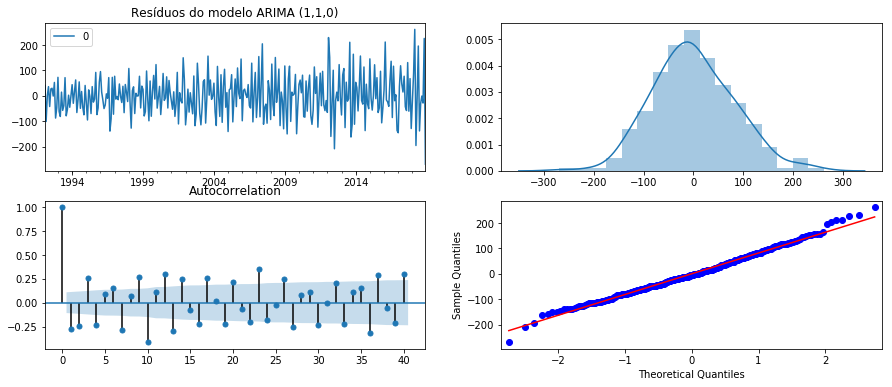

In [356]:
residuals = pd.DataFrame(arima3.resid)
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuals.plot(title="Resíduos do modelo ARIMA (1,1,0)", ax=ax[0][0])
sns.distplot(arima3.resid,ax=ax[0][1])
#residuals.plot(kind='kde', title='Distribuição dos resíduos', ax=ax[0][1])
plot_acf(arima3.resid,lags=40, ax=ax[1][0])
qqplot(arima3.resid,line='s', ax=ax[1][1]);

Aqui nesse outro gráfico será gerada a série temporal completa com o modelo ARIMA(1,1,0). Podemos ver que o que foi gerado acompanha bem a série original.

<Figure size 432x288 with 0 Axes>

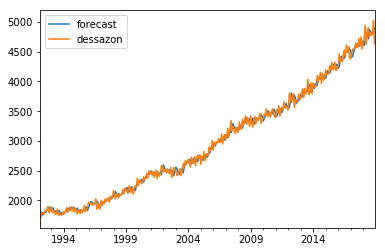

In [357]:
plt.figure()
arima3.plot_predict(dynamic=False)
plt.show();

Aqui pode-se ver o sumário do modelo, onde os parâmetros do modelo são uma contante e um componente autorregressivo.

In [358]:
arima1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.dessazon   No. Observations:                  323
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1945.608
Method:                           css   S.D. of innovations             99.945
Date:                Fri, 10 Jul 2020   AIC                           3895.216
Time:                        21:46:12   BIC                           3902.771
Sample:                    02-01-1992   HQIC                          3898.232
                         - 12-01-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8629      5.561      1.594      0.111      -2.037      19.762
==============================================================================
"""

Agora que temos um modelo que passou pelas etapas Identificação, Estimação e Diagnóstico dos resíduos, vamos ver o desempenho desse modelo para prever uma parte da sua própria série temporal. Vamos separar a série em dados de treino e teste, onde com os dados de treino vamos alimentar o modelo **ARIMA(1,1,0)** e com os dados de teste vamos comparar com as previsões geradas para o mesmo período dos dados de teste.

In [359]:
#Dados de treino para treinar o modelo
treino = beer2['dessazon'].iloc[:-24]

#Dados de teste para avaliação do desempenho
teste = beer2['dessazon'].iloc[-24:]

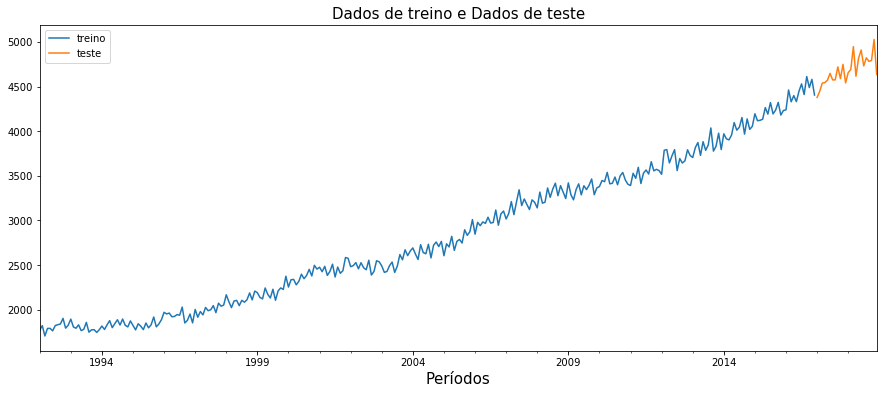

In [360]:
plt.title('Dados de treino e Dados de teste',size=15)
treino.plot(figsize=(15,6))
teste.plot()
plt.xlabel('Períodos',size=15)
plt.legend(['treino','teste']);

In [361]:
#Vamos gerar um novo modelo para, porém apenas usando os dados de treino
teste1 = ARIMA(treino,order=(1,1,0)).fit()

In [362]:
#Aqui podemos ver o sumário do modelo
teste1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.dessazon   No. Observations:                  299
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1722.501
Method:                       css-mle   S.D. of innovations             76.805
Date:                Fri, 10 Jul 2020   AIC                           3451.002
Time:                        21:46:15   BIC                           3462.103
Sample:                    02-01-1992   HQIC                          3455.445
                         - 12-01-2016                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.9795      2.832      3.171      0.002       3.429      14.530
ar.L1.D.dessazon    -0.5704      0.048    -11.945      0.000      -0.664      -0.477
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7532           +0.0000j            1.7532            0.5000
-----------------------------------------------------------------------------
"""

In [363]:
#essas duas variáveis serão usadas para especificar os períodos das previsões
start=len(treino)
end=len(treino) + len(teste) - 1

In [367]:
#gerando as previsões
predicoes1=teste1.predict(start,end,typ='levels').rename('ARIMA(1,1,0)')

In [368]:
predicoes1

2017-01-01    4519.230161
2017-02-01    4468.160811
2017-03-01    4511.391882
2017-04-01    4500.834507
2017-05-01    4520.957768
2017-06-01    4523.580962
2017-07-01    4536.186098
2017-08-01    4543.097589
2017-09-01    4553.256705
2017-10-01    4561.563393
2017-11-01    4570.926695
2017-12-01    4579.687310
2018-01-01    4588.791695
2018-02-01    4597.699996
2018-03-01    4606.720142
2018-04-01    4615.676492
2018-05-01    4624.669231
2018-06-01    4633.641213
2018-07-01    4642.625035
2018-08-01    4651.602104
2018-09-01    4660.583025
2018-10-01    4669.561749
2018-11-01    4678.541726
2018-12-01    4687.520988
Freq: MS, Name: ARIMA(1,1,0), dtype: float64

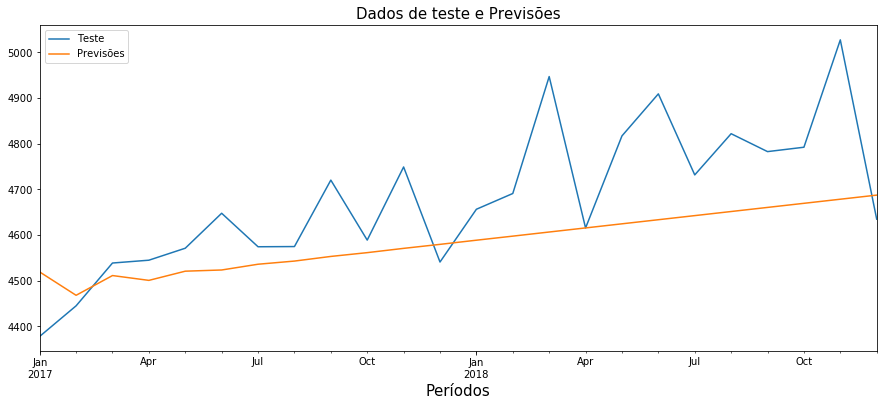

In [369]:
plt.title('Dados de teste e Previsões',size=15)
teste.plot(figsize=(15,6))
predicoes1.plot()
plt.xlabel('Períodos',size=15)
plt.legend(['Teste','Previsões']);

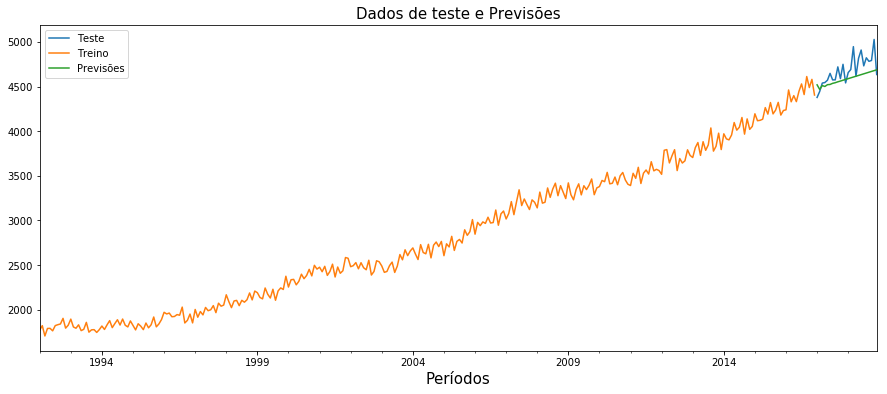

In [370]:
plt.title('Dados de teste e Previsões',size=15)
teste.plot(figsize=(15,6))
treino.plot(figsize=(15,6))
predicoes1.plot()
plt.xlabel('Períodos',size=15)
plt.legend(['Teste','Treino','Previsões']);

In [371]:
#na base de consumo de cerveja que tínhamos criado anteriormente, iremos inserir as previsões e iremos adicionar a elas a 
#sazonalidade que foi extraída na decomposição multiplicativa.
beer2

,beer,sazonalidade,dessazon
1992-01-01,1509,0.851488,1772.192481
1992-02-01,1541,0.845652,1822.263466
1992-03-01,1597,0.935704,1706.736293
1992-04-01,1675,0.935312,1790.847179
1992-05-01,1822,1.016572,1792.297425
...,...,...,...
2018-08-01,4898,1.015768,4821.968781
2018-09-01,4598,0.961365,4782.782323
2018-10-01,4737,0.988448,4792.362769
2018-11-01,5130,1.020399,5027.446229


In [372]:
#inserindo as previsões na base de consumo de cerveja
beer2['previsões 1']=pd.DataFrame(predicoes1,index=teste.index)

In [373]:
#criando uma nova coluna onde será inserida a sazonalidade às previsões
beer2['prev_sazon']=beer2['previsões 1']*beer2['sazonalidade']

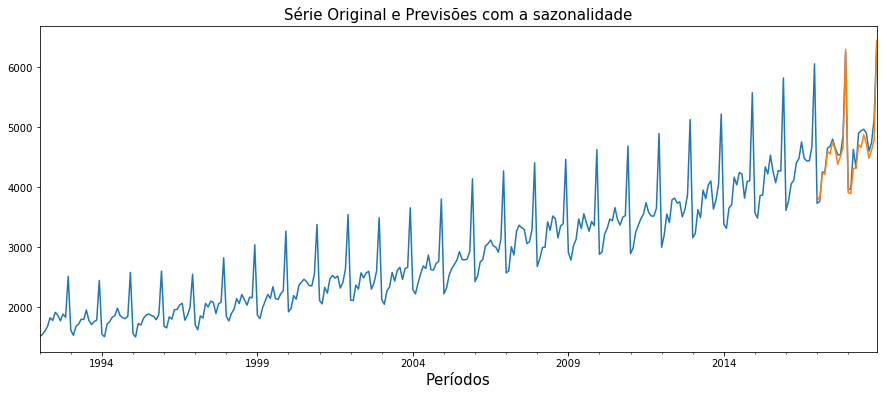

In [396]:
beer2['beer'].plot(figsize=(15,6))
beer2['prev_sazon'].plot()
plt.title('Série Original e Previsões com a sazonalidade',size=15)
plt.xlabel('Períodos',size=15)
plt.show();

In [426]:
#Irei criar uma coluna só com os últimos 24 valores da coluna beer
beer2['24 meses']=beer2['beer'].iloc[-24:]

In [427]:
#vou criar um outro dataset menor e sem o valores NaN's
beer3=beer2[['prev_sazon','24 meses']]
beer3= beer3.dropna()

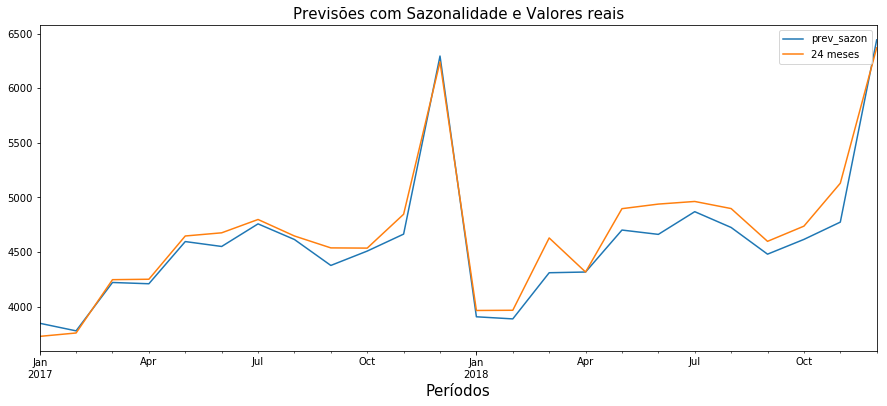

In [429]:
beer3.plot(figsize=(15,6))
plt.title('Previsões com Sazonalidade e Valores reais',size=15)
plt.xlabel('Períodos',size=15)
plt.show();

#Note que os valores estão muito próximos um do outro

In [431]:
#Comparando as médias vemos que elas bastante próximas
print('A média das previsões é:',beer2['prev_sazon'].mean())
print('A média dos valores reais é:',beer2['24 meses'].mean())

A média das previsões é: 4588.105501576237
A média dos valores reais é: 4680.166666666667


Será que essas médias são estatisticamente iguais ?

Para responder essa pergunta podemos usar o teste t que testa se duas amostras possuem médias iguais. Olhando a tabela t-student a estatística t-student para a os graus de liberdade (>50) e com 5% de nível de significância é 2.009.

Como a estatística do teste é menor que o valor tabulado, **aceitamos a hipótese nula de que as médias são estatisticamente iguais**.

In [443]:
print('A estatística t-student do teste em módulo é:',np.absolute(sct.ttest_ind(beer3['prev_sazon'],beer3['24 meses'])[0]))
print('O p-valor:',sct.ttest_ind(beer3['prev_sazon'],beer3['24 meses'])[1])

A estatística t-student do teste é: 0.5056755825118217
O p-valor: 0.6154990962301399


# Avaliação do modelo ARIMA (1,1,0)

Para avaliar o modelo usaremos o **MAE** (Erro médio absoluto) e o **RMSE** (Raiz do erro médio quadrático), que são as métricas mais comuns para avaliação de modelos como do tipo regressão ou séries temporais.

O **MAE** (Mean Absolute Erro - Erro médio absoluto) é dado pela fórmula:

$\frac{\sum_{t=1}^{n}|Y_{t} - Yprev_{t}|}{n}$ ou $\frac{\sum_{t=1}^{n}|e_{t}|}{n}$

O **RMSE** (Root Mean Squared Erro - Raiz do Erro médio quadrado) é dado pela fórmula:

$\sqrt\frac{\sum_{t=1}^{n}(Y_{t} - Yprev_{t})^{2}}{n}$ ou $\sqrt\frac{\sum_{t=1}^{n}e_{t}^{2}}{n}$

Não existe um método melhor do que o outro. O **RMSE** tem a vantagem de penalização de erros, já o **MAE** tem a vantagem de ser melhor interpretado. Por esse motivo usaremos as duas métricas.

Como apenas o modelo ARIMA(1,1,0) passou na diagnóstico dos resíduos, apenas esse modelo será avaliados pelas métricas já citadas.

In [401]:
print('O RMSE do modelo ARIMA(1,1,0) é:',rmse(beer2['prev_sazon'].iloc[-24:],beer2['beer'].iloc[-24:]))
print('O MAE do modelo ARIMA(1,1,0) é:',mean_absolute_error(beer2['prev_sazon'].iloc[-24:],beer2['beer'].iloc[-24:]))

O RMSE do modelo ARIMA(1,1,0) é: 148.01801931223082
O MAE do modelo ARIMA(1,1,0) é: 114.15347796765046


# Box-Jenkins - Etapa de Previsão

Após todas as etapas anteriores iremos gerar as previsões do modelo **ARIMA(1,1,0)** para um período fora da série temporal original, ou seja, para um horizonte de tempo desconhecido.

Para isso vamos pegar o modelo **arima3** correspondete ao **ARIMA(1,1,0)** e criaremos a previsões, conforme a seguir.

In [446]:
#gerando as previsões e adicionando a sazonalidade
forecast = arima3.predict(start = len(beer2['dessazon']),
                          end=len(beer2['dessazon'])+11,
                          typ='levels').rename('Previsões ARIMA(1,1,0)')*beer2['sazonalidade'].iloc[-12:].values

In [447]:
forecast

2019-01-01    4156.257909
2019-02-01    4017.412758
2019-03-01    4531.043588
2019-04-01    4492.342274
2019-05-01    4921.226100
2019-06-01    4862.694250
2019-07-01    5089.762604
2019-08-01    4932.577873
2019-09-01    4680.653694
2019-10-01    4819.659611
2019-11-01    4986.151221
2019-12-01    6727.522110
Freq: MS, Name: Previsões ARIMA(1,1,0), dtype: float64

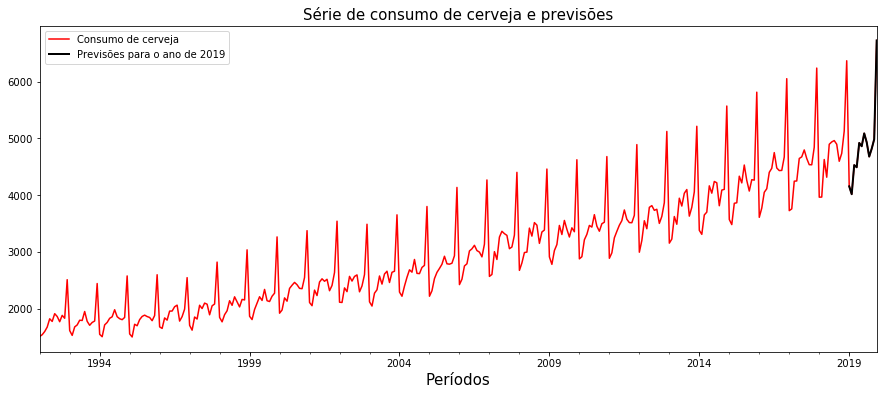

In [473]:
#beer2['beer'].plot(figsize=(15,6),color='r')
beer2['beer'].append(forecast).plot(figsize=(15,6),color='r')
forecast.plot(color='black',linewidth=2)
plt.xlabel('Períodos',size=15)
plt.title('Série de consumo de cerveja e previsões',size=15)
plt.legend(['Consumo de cerveja','Previsões para o ano de 2019'])
plt.show()

#Abaixo o gráfico com a série original e as previsões geradas pelo modelo ARIMA(1,1,0) com a sazonalidade adicionada